In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [14]:
##Image Augmentation 

train_datagen = ImageDataGenerator(
    rescale = 1./255, ##normalize
    zoom_range=0.2,
    horizontal_flip= True)

training_set = train_datagen.flow_from_directory(
        r"ASD\TrainTest\train",
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
testing_set = test_datagen.flow_from_directory(
        r"ASD\TrainTest\test",
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')

training_set.class_indices


Found 391 images belonging to 2 classes.
Found 156 images belonging to 2 classes.


{'Control': 0, 'Patient': 1}

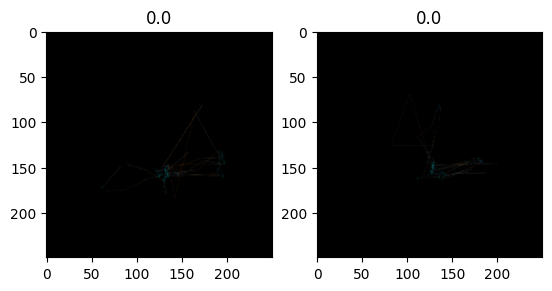

In [15]:
# get a batch of images and labels from the training set
images, labels = next(training_set)
# create a figure with 2x2 grid of subplots
fig, axes = plt.subplots(1, 2)

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(labels[i])

# show the figure
plt.show()

In [16]:
##Defining the Network 
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu', input_shape=[250,250,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
## Training
history = cnn.fit(x=training_set, validation_data=testing_set, epochs = 10)

Epoch 1/10
13/13 [==============================] - 11s 863ms/step - loss: 0.3609 - accuracy: 0.8491 - val_loss: 0.7501 - val_accuracy: 0.6923
Epoch 2/10
13/13 [==============================] - 11s 809ms/step - loss: 0.3746 - accuracy: 0.8440 - val_loss: 0.6350 - val_accuracy: 0.6731
Epoch 3/10
13/13 [==============================] - 11s 825ms/step - loss: 0.3390 - accuracy: 0.8389 - val_loss: 0.8730 - val_accuracy: 0.6923
Epoch 4/10
13/13 [==============================] - 11s 808ms/step - loss: 0.3221 - accuracy: 0.8593 - val_loss: 0.7534 - val_accuracy: 0.6474
Epoch 5/10
13/13 [==============================] - 11s 814ms/step - loss: 0.3365 - accuracy: 0.8696 - val_loss: 0.7044 - val_accuracy: 0.6731
Epoch 6/10
13/13 [==============================] - 11s 815ms/step - loss: 0.3118 - accuracy: 0.8849 - val_loss: 0.8217 - val_accuracy: 0.6923
Epoch 7/10
13/13 [==============================] - 11s 806ms/step - loss: 0.2870 - accuracy: 0.8772 - val_loss: 0.9315 - val_accuracy: 0.6859

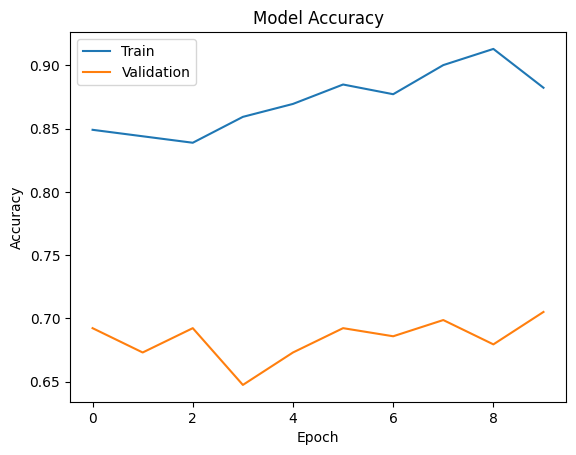

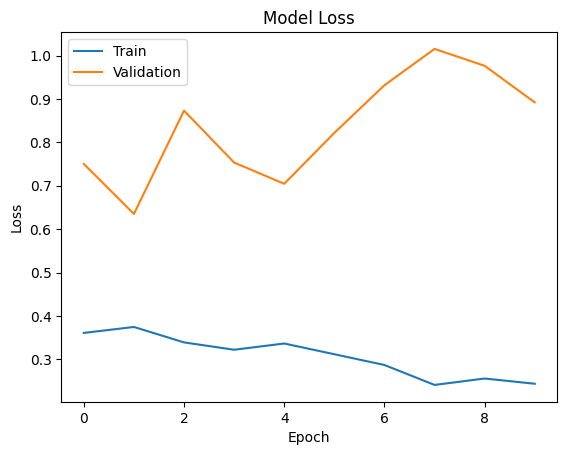

In [19]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()